# Booking.com Data Job Analysis


Introduction

>**We rely on AI to analyse your CV and enrich it with market data to get a well rounded skill set overview. Consequently, your skills will be matched with the best available career opportunity.**

Project Objective


In [38]:
#Imports
import numpy as np
import pandas as pd

#Settings for string legibility
pd.set_option('display.max_rows', 500)
pd.set_option("display.max_colwidth", -1)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#String manipulations
import re

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
plt.rcParams['figure.figsize'] = [20,16]
plt.rcParams['figure.dpi'] = 300
%config InlineBackend.figure_format = 'svg'
sns.set_style("whitegrid")

#Wordcloud
from wordcloud import WordCloud
from nltk.corpus import stopwords

#Quality of life
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Booking_Jobs.csv')

In [3]:
print('Dataframe shape: ', df.shape)
df.head()

Dataframe shape:  (108, 2)


Job Title  \
0  Data Engineer                                                        
1  Manager Data Science Insights - Content Agency                       
2  Senior Data Engineering Manager - Data & Machine Learning Platform   
3  Senior Data Engineer - Data & Machine Learning Platform              
4  Data Analyst Trip Foundations                                        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Job Title        108 non-null    object
 1   Job Description  108 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [5]:
sample_structure = df['Job Description'].sample(5).str.split('\n', expand=True) #Taking random samples to determine structure of job postings, and determine best strategy for sorting data

In [6]:
sample_structure

0  \
39  At Booking.com, data drives our decisions. Technology is at our core. And innovation is everywhere. But our company is more than datasets, lines of code, or A/B tests. We’re the thrill of the first night in a new place. The excitement of the next morning. The friends you make. The journeys you take. The sights you see. And the food you sample. Through our products, partners and people, we make it easier for everyone to experience the world.                                                                                                                                                                                                                                                                                                                                                                                          
97  At Booking.com we aim to provide all of our guests with the widest choice of experiences at the best possible prices. The Partnerships team focuses on bringing these offerings to businesses of any size that need to tap into any travel related content or inventory anywhere in the world. In order to do so we engage with existing and future distribution partners to realize this goal.                                                                                                                                                                                                                                                                                                                                                                                                                                                       
4   It wasn’t so long ago that booking a trip to see the Eiffel Tower, stroll down New York’s iconic Madison Avenue or feel the sand between our toes on Copacabana Beach was simply a matter of a few taps on our smartphone.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
41  Our flight business is one of the cornerstones of our connected trip strategy. We ought to offer the best and most convenient flights to every customer, those that start their trip by buying a flight, or those that are complementing their existing journey with a flight. We do this by having the best inventory available at the most competitive prices powering a site that solves all the pain points of booking a flight today.                                                                                                                                                                                                                                                                                                                                                                                                            
62  At Booking.com, we believe travel is a force for good in the world, connecting people and cultures, reducing barriers and increasing understanding. Our mission is to make it easier for everyone to experience the world. We make this possible by allowing everyone to book their entire trip with Booking.com. The Attractions business vertical is part of the Trips Business Unit where we are making a connected trip possible for our customers. Attractions focuses on the wide variety of attractions, tours, and activities available at destinations around the world. We aim to make it easier for our customers to discover, book, and experience any attraction at unbeatable value. As trave

In [7]:
x = df['Job Description'][42]

In [8]:
x

'At Booking.com, we are seeking a Web Analyst\nAs a Web Analyst, you will be part of the Digital Content Platforms team within Booking.com Digital Partner Experience (DPE) department. Within DPE, we focus on scaling the management of our global accommodation partner base and empowering them to discover our commercial growth opportunities. \nYou will play a great part in analysing existing data and providing insights to increase the reach and effectiveness of our partner facing content and marketing campaigns on our Partner Hub platform. \nIn this role, you will be optimising the performance of the Partner Hub through innovation and experimentation strategies as well as driving projects that increase website traffic. \nYou will manage complex projects and marketing campaigns on our platforms that create high quality digital experiences for our partners. \nResponsibilities \nOwnership on maintaining and optimising for the main KPIs of the Partner Hub (including the platforms reach, engag

In [9]:
x.split('\n')

['At Booking.com, we are seeking a Web Analyst',
 'As a Web Analyst, you will be part of the Digital Content Platforms team within Booking.com Digital Partner Experience (DPE) department. Within DPE, we focus on scaling the management of our global accommodation partner base and empowering them to discover our commercial growth opportunities. ',
 'You will play a great part in analysing existing data and providing insights to increase the reach and effectiveness of our partner facing content and marketing campaigns on our Partner Hub platform. ',
 'In this role, you will be optimising the performance of the Partner Hub through innovation and experimentation strategies as well as driving projects that increase website traffic. ',
 'You will manage complex projects and marketing campaigns on our platforms that create high quality digital experiences for our partners. ',
 'Responsibilities ',
 'Ownership on maintaining and optimising for the main KPIs of the Partner Hub (including the pla

### Most common words

We'll start by adding all Data job descriptions together to find the most commonly used words on the Booking.com career site. Doing this will allow us to gain insight into what words the company uses to describe itself, their values, and what they seek in future employees.

In [29]:
all_descriptions = " ".join(description for description in df['Job Description'])
print ("There are {} words in the combined data-related job descriptions.".format(len(all_descriptions)))

There are 549271 words in the combined data-related job descriptions.


### Filtering out stopwords

To get a more accurate reprentation of which key words matter most we'll filter out common stopwords. Though there are many libraries that provide lists of stopwords on various languages, we'll need to add a few more words that are specific to this platform.

In [39]:
stopwords = sorted(stopwords.words('english')) #Using the Natural Language Toolkit (NLTK) library
stopwords_booking = ['booking','com', 'booking.com', 'part', 'right', 'make', 'work', 'working','need', #Adding platform specific words
                     'e','g', '&','within', 'well', '-', '.', 'including', 'high', 'role', 'relevant', 
                     'strong', 'key','one', 'year', 'years', 'looking', 'everyone', 'easier', 'sexual', 
                     'orientation','best', 'company', 'B', 'application', 'equal', 'opportunity', 'national', 'world'
                     'origin', 'across', 'able', 'genetic', 'disability', 'new', 'gender', 'identity', 'level']
stopwords.extend(stopwords_booking) #Combining both into a stopwords list

### Wordcloud

One way to make this intuitively insightful is to use a wordcloud, which represents the most commons words in a visual manner. The size of each word corresponds to the frequency of its use.

In [40]:
wordcloud = WordCloud(stopwords=stopwords, min_font_size=8, max_font_size=100, max_words=500, width=800, height=400,prefer_horizontal=.5, background_color="white").generate(all_descriptions)

In [41]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### What did we learn?

A few words pop out immediately:
- Data
- Experience
- Business
- Team
- Product

These are at the core of the Booking.com business and values, and unsurprisingly so. Having included ALL data-related jobs, we can only spot general trends.


### Bar Chart

Wordclouds are great for getting a sense of what's important, but ranking the top 20 most relevant words becomes more difficult. That's why we use a bar chart to accurately rank and communicate our findings.

In [42]:
def wordBarGraph(df,column,title):
    '''Creates bar graph by taking:
    - dataframe
    - title of the column
    - title of the plot'''
    words_description = [ z.lower() for y in #lower strings loop
                        [ x.split() for x in df[column]] #nested loop to split strings in column
                        for z in y]
    word_count_dict = dict(Counter(words_description)) #create dictionary of words
    words_popular = sorted(word_count_dict, key = word_count_dict.get, reverse = True) #sort word based on dictionary
    words_popular_nonstop = [w for w in words_popular if w not in stopwords] #compare to stopwords
    
    plt.barh(range(50), [word_count_dict[w] for w in reversed(words_popular_nonstop[0:50])]) #horizontal bar plot using top 50 words
    plt.yticks([x for x in range(50)], reversed(words_popular_nonstop[0:50])) #setting vertical ticks to words to corresponding bar
    plt.box(on=None)
    plt.title(title, fontsize=30)
    plt.show()

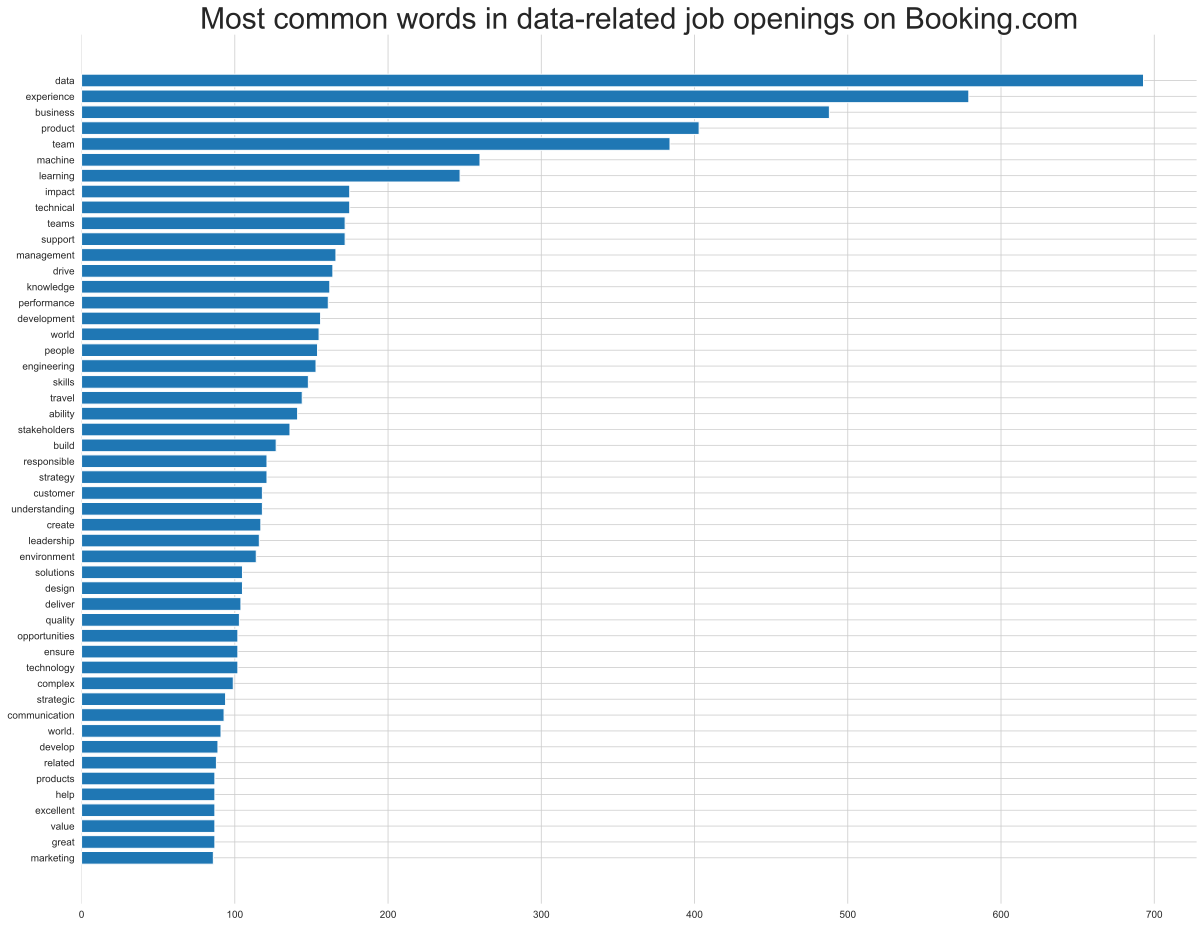

In [43]:
wordBarGraph(df,'Job Description','Most common words in data-related job openings on Booking.com') #Calling the Bar Graph function to plot

### What did we learn?

Having looked only at single words without context we can conclude a few things:
- Through Data and Experience reign supreme

In [ ]:
def wordBarGraphSelected(df,column,title):
    '''Creates bar graph by taking:
    - dataframe
    - title of the column
    - title of the plot'''
    words_description = [ z.lower() for y in #lower strings loop
                        [ x.split() for x in df[column]] #nested loop to split strings in column
                        for z in y]
    word_count_dict = dict(Counter(words_description)) #create dictionary of words
    words_popular = sorted(word_count_dict, key = word_count_dict.get, reverse = True) #sort word based on dictionary
    words_popular_nonstop = [w for w in words_popular if w not in stopwords] #compare to stopwords
    
    plt.barh(range(50), [word_count_dict[w] for w in reversed(words_popular_nonstop[0:50])]) #horizontal bar plot using top 50 words
    plt.yticks([x for x in range(50)], reversed(words_popular_nonstop[0:50])) #setting vertical ticks to words to corresponding bar
    plt.box(on=None)
    plt.title(title, fontsize=30)
    plt.show()

In [65]:
words_description = [ z.lower() for y in #lower strings loop
                    [ x.split() for x in df['Job Description']] #nested loop to split strings in column
                    for z in y]
word_count_dict = dict(Counter(words_description)) #create dictionary of words
words_popular = sorted(word_count_dict, key = word_count_dict.get, reverse = True) #sort word based on dictionary

#words_popular_nonstop = [w for w in words_popular if w not in stopwords] #compare to stopwords

In [69]:
word_count_dict

{'data': 693,
 'engineer': 8,
 '(data': 4,
 'enablement)': 1,
 'about': 88,
 'the': 2910,
 'company': 118,
 'not': 55,
 'long': 34,
 'ago,': 3,
 'booking': 104,
 'a': 1366,
 'trip': 64,
 'to': 2726,
 'see': 32,
 'eiffel': 22,
 'tower,': 22,
 'stroll': 22,
 'down': 25,
 'new': 222,
 'york’s': 22,
 'iconic': 22,
 'madison': 22,
 'avenue': 22,
 'or': 463,
 'feel': 49,
 'sand': 22,
 'between': 44,
 'our': 702,
 'toes': 22,
 'on': 561,
 'copacabana': 22,
 'beach': 22,
 'was': 29,
 'complex': 99,
 'and': 4824,
 'time': 46,
 'consuming.': 3,
 'now': 3,
 'it': 156,
 'is': 631,
 'simply': 22,
 'matter': 33,
 'of': 2015,
 'few': 22,
 'taps': 22,
 'smartphone.': 22,
 'in': 1312,
 'fact,': 22,
 'that’s': 22,
 'what': 102,
 'we': 597,
 'do': 72,
 'at': 343,
 'booking.com.': 37,
 'make': 138,
 'easier': 62,
 'for': 953,
 'everyone': 133,
 'experience': 579,
 'world.': 91,
 'while': 70,
 'that': 488,
 'world': 155,
 'might': 29,
 'little': 24,
 'farther': 24,
 'away': 24,
 'right': 117,
 'now,': 26,


In [73]:
import collections

od = collections.OrderedDict(sorted(word_count_dict.items(), reverse=True))


In [77]:
{k: v for k, v in sorted(word_count_dict.items(), key=lambda item: item[1], reverse=True)}

{'and': 4824,
 'the': 2910,
 'to': 2726,
 'of': 2015,
 'a': 1366,
 'in': 1312,
 'with': 1028,
 'for': 953,
 'our': 702,
 'data': 693,
 'is': 631,
 'we': 597,
 'experience': 579,
 'you': 569,
 'on': 561,
 'that': 488,
 'business': 488,
 'or': 463,
 'as': 438,
 'will': 422,
 'product': 403,
 'are': 385,
 'team': 384,
 'an': 372,
 'booking.com': 360,
 'be': 354,
 'work': 349,
 'at': 343,
 'working': 312,
 'your': 312,
 'by': 286,
 'machine': 260,
 'strong': 255,
 'all': 249,
 'learning': 247,
 'their': 230,
 'from': 226,
 'new': 222,
 'through': 197,
 'within': 189,
 'opportunity': 189,
 'other': 185,
 'this': 176,
 'impact': 175,
 'technical': 175,
 'across': 174,
 'teams': 172,
 'support': 172,
 'have': 168,
 'management': 166,
 'drive': 164,
 'knowledge': 162,
 'performance': 161,
 '&': 159,
 'it': 156,
 'development': 156,
 'world': 155,
 'people': 154,
 'engineering': 153,
 'skills': 148,
 'travel': 144,
 'can': 141,
 'ability': 141,
 'make': 138,
 'into': 136,
 'stakeholders': 136,


In [ ]:
#I'm trying to group together TEAM mand TEAMS to see what difference that makes
# Make WORDLCOUDS AND PLOTS for SPECIFIC DATA JOBS